In [2]:
! pip install geopandas

   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   --------------------- ------------------ 10.5/19.2 MB 54.2 MB/s eta 0:00:01
   ---------------------------------------- 19.2/19.2 MB 47.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 6.3/6.3 MB 34.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 46.8 MB/s eta 0:00:00

   ---------------------------------------- 0/4 [shapely]
   ---------------------------------------- 0/4 [shapely]
   ---------- ----------------------------- 1/4 [pyproj]
   -------------------- ------------------- 2/4 [pyogrio]
   -------------------- ------------------- 2/4 [pyogrio]
   ------------------------------ --------- 3/4 [geopandas]
   ------------------------------ --------- 3/4 [geopandas]
   ---------------------------------------- 4/4 [geopandas]



In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import seaborn as sns

file_folder = ('train.csv')
titanic_df = pd.read_csv(file_folder)

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
#A simple translation dictionary for our embarkation ports.

port_locations = {
    'S': {'long': -1.405, 'lat': 50.909},  # Southampton, England
    'C': {'long': -1.623, 'lat': 49.638},  # Cherbourg, France
    'Q': {'long': -8.300, 'lat': 51.850},  # Queenstown (Cobh), Ireland
}

# Add longitude and latitude columns to our DataFrame.
titanic_df['longitude'] = titanic_df['Embarked'].\
           map(lambda x: port_locations.get(x, {}).get('long'))
titanic_df['latitude'] = titanic_df['Embarked'].\
           map(lambda x: port_locations.get(x, {}).get('lat'))
titanic_df.head()

# Drop any passengers with a missing 'Embarked' value, as we can't plot them.
df_geo = titanic_df.dropna(subset=['Embarked'])

# Load the world map from geopandas's from a direct URL
world = geopandas.\
    read_file("https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson")

# Let's check our new data
print("--- Data with Coordinates ---")
print(df_geo[['Embarked', 'longitude', 'latitude']].head())

--- Data with Coordinates ---
  Embarked  longitude  latitude
0        S     -1.405    50.909
1        C     -1.623    49.638
2        S     -1.405    50.909
3        S     -1.405    50.909
4        S     -1.405    50.909


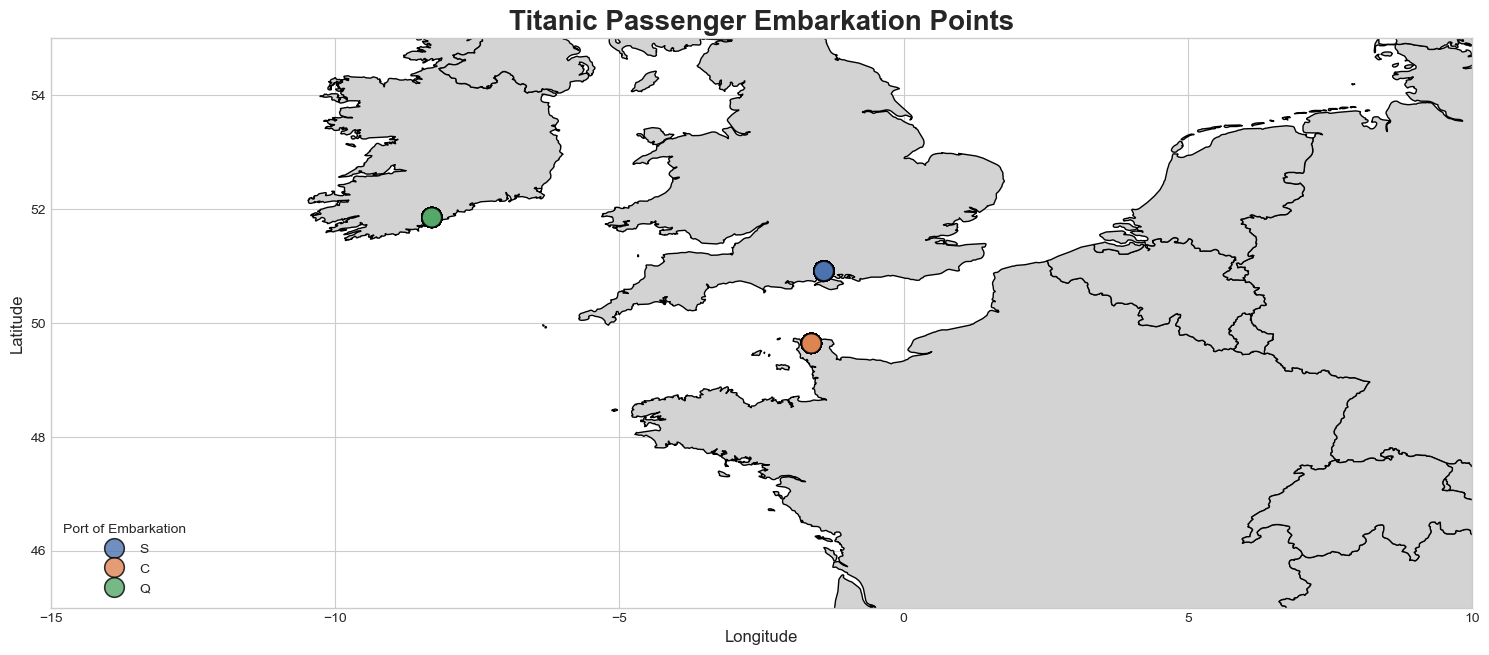

In [ ]:
# Set up a beautiful plot style.
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the world map first. We'll set the extent of the map to show Europe.

world.plot(ax=ax, color='lightgray', edgecolor='black')

# Now, plot our passenger data points on top of the world map.
# We'll use color to distinguish the ports.

sns.scatterplot(x='longitude', y='latitude', hue='Embarked',
                data=df_geo, ax=ax, s=200, marker='o', palette='deep',
                legend='full', alpha=0.8, edgecolor='black')

# Zoom in on the relevant area (Europe and the North Atlantic)
ax.set_xlim([-15, 10])
ax.set_ylim([45, 55])

# Add proper titles and labels.

ax.set_title("Titanic Passenger Embarkation Points",
              fontsize=20, fontweight='bold')
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Adjust the legend.

ax.legend(title='Port of Embarkation', loc='lower left')
plt.tight_layout()
plt.show()
